<p style="font-size: 40px; font-weight: bold; text-align: center;">Traffic Signs Detection Vol_1</p>

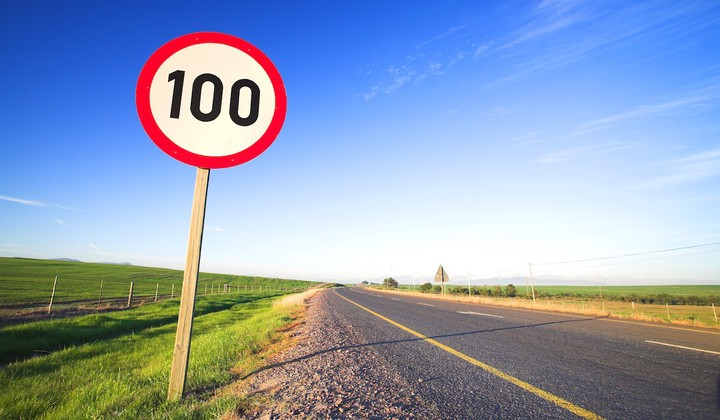

Traffic signs detection is a computer vision project 
that aims to automatically identify and classify traffic 
signs in images or video frames. The goal of this project 
is to develop a system that can accurately recognize traffic 
signs and understand their meanings in order to assist with 
navigation and obey traffic regulations. This can be useful 
for autonomous vehicles, as well as for assisting human drivers. 
Traffic signs detection systems typically involve training a machine 
learning model on a large dataset of labeled traffic sign images, 
and then using the trained model to classify traffic signs
in real-time video frames or images. The performance of a 
traffic signs detection system is typically evaluated based 
on its ability to accurately classify traffic signs, 
and to do so in a timely manner.

- 0 - 'Speed limit (20km/h)' 
- 1 - 'Speed limit (30km/h)' 
- 2 - 'Speed limit (50km/h)'
- 3 - 'Speed limit (60km/h)' 
- 4 - 'Speed limit (70km/h)' 
- 5 - 'Speed limit (80km/h)'
- 6 - 'End of speed limit (80km/h) 
- 7 - 'Speed limit (100km/h)' 
- 8 - 'Speed limit (120km/h)'
- 9 - 'No passing' 
- 10 - 'No passing for vehicles over 3.5 metric tons'
- 11 - 'Right-of-way at the next intersection 
- 12 - 'Priority road' 
- 13 - 'Yield 
- 14 - 'Stop' 
- 15 - 'No vehicles'
- 16 - 'Vehicles over 3.5 metric tons prohibited' 
- 17 - 'No entry'  
- 18 - 'General caution' 
- 19 - 'Dangerous curve to the left' 
- 20 - 'Dangerous curve to the right'
- 21 - 'Double curve' 
- 22 - 'Bumpy road'
- 23 - 'Slippery road'
- 24 - 'Road narrows on the right' 
- 25 - 'Road work' 
- 26 - 'Traffic signals' 
- 27 - 'Pedestrians' 
- 28 - 'Children crossing' 
- 29 - 'Bicycles crossing' 
- 30 - 'Beware of ice/snow' 
- 31 - 'Wild animals crossing' 
- 32 - 'End of all speed and passing limits'
- 33 - 'Turn right ahead' 
- 34 - 'Turn left ahead' 
- 35 - 'Ahead only' 
- 36 - 'Go straight or right' 
- 37 - 'Go straight or left' 
- 38 - 'Keep right'
- 39 - 'Keep left' 
- 40 - 'Roundabout mandatory' 
- 41 - 'End of no passing'
- 42 - 'End of no passing by vehicles over 3.5 metric tons'

## Import libraries

In [1]:
# Import necessary libraries

# For data serialization, saving and loading model
import pickle

# For data visualization
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# For data manipulation and computation
import numpy as np

# For generating random numbers
import random

# For model evaluation
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score
)

# For building deep learning models
from keras.models import Sequential
from keras.layers import (
    Conv2D, 
    MaxPooling2D,
    AveragePooling2D,
    Flatten, 
    Dense,
    Dropout
)

# Importing Callback functions
from keras.callbacks import (
    EarlyStopping, 
    ModelCheckpoint
)

2023-01-30 15:31:44.066784: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Functions

In [2]:
def plot_subplot(ax, label, record, step):
    # Find the index of the first occurrence of the input label in y_train
    index = pd.Series(y_train)[pd.Series(y_train)==label].index[step]
    
    # Display the corresponding image from X_train on the given subplot axis using the imshow method
    ax.imshow(X_train[index])
    
    # Hide the axis
    ax.axis('off')
    
    # Set the title of the subplot
    # label, precision score, train labels, and test labels are obtained from the input record dictionary
    ax.set_title(f'label : {label}\nprecision_score : {record["precision_score"]}\nTrain_labels : {record["Train_labels"]}\n Test_labels : {record["Test_labels"]}')

## Import Dataset

In [3]:
# Read the training, testing, and validation data
train = pickle.load(open("traffic-signs-data/train.p", "rb"))
test = pickle.load(open("traffic-signs-data/test.p", "rb"))
valid = pickle.load(open("traffic-signs-data/valid.p", "rb"))

# Assign the features and labels to the corresponding variables
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_valid, y_valid = valid['features'], valid['labels']

## Data analysis

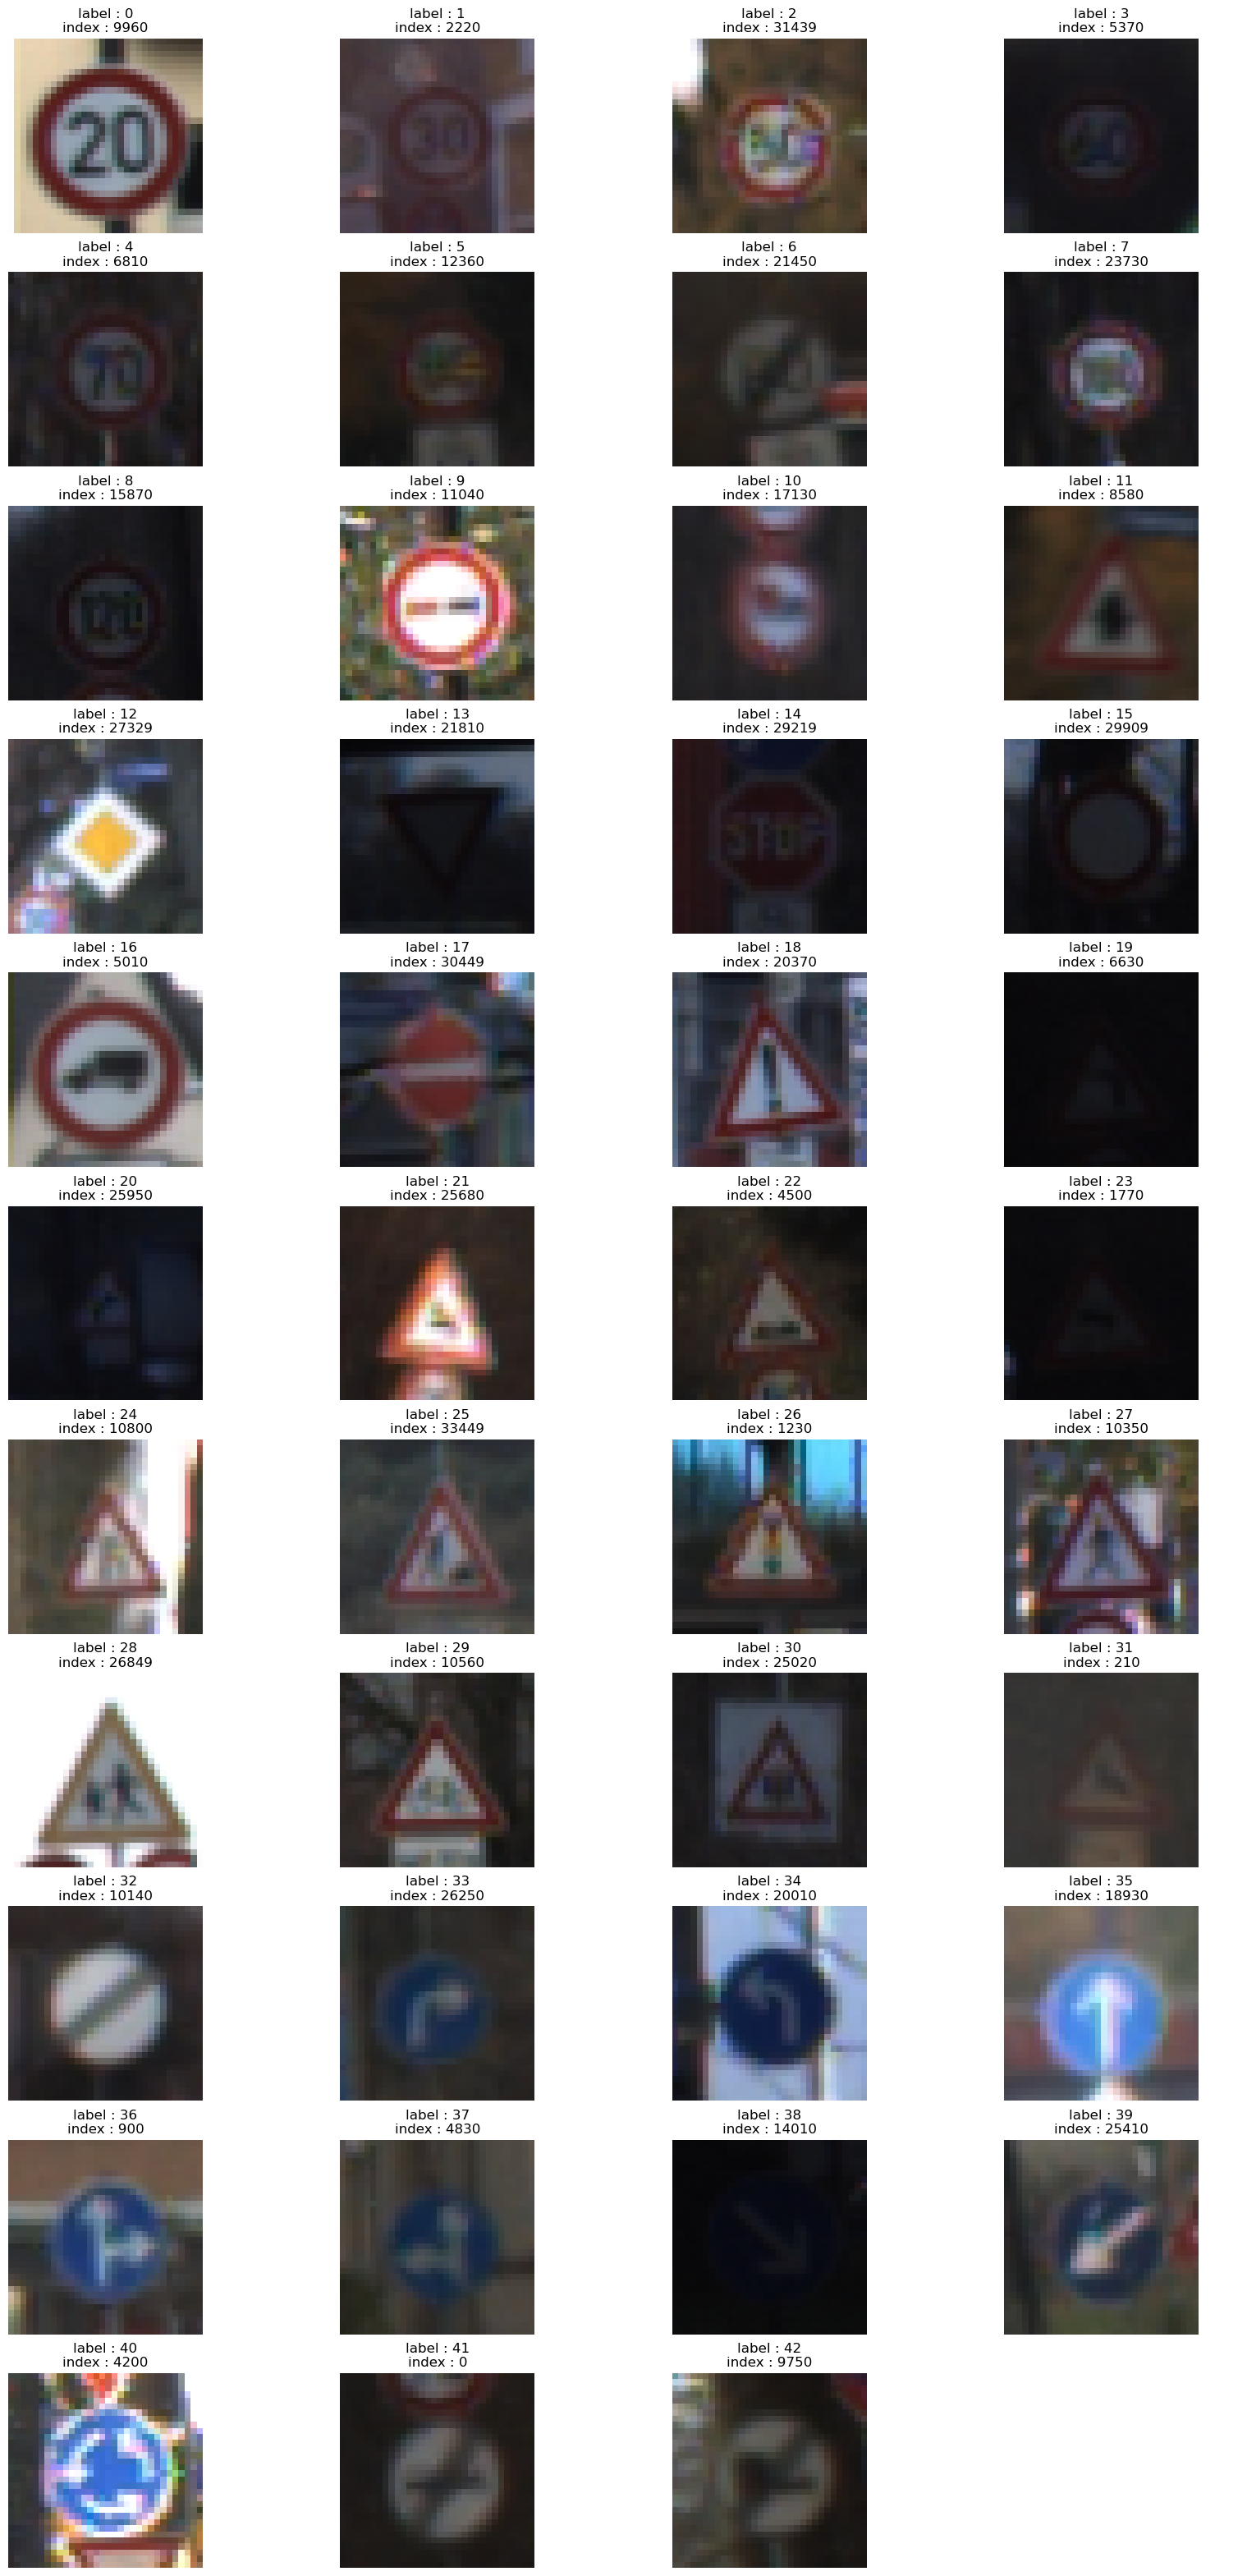

In [4]:
'''
    At the beginning of the data analysis, 
    I want to look at all the labels and 
    what pictures they contain
'''

# Initialize a dictionary to hold the labels and index
labels_dict = {
    'label_list':[],
    'index_list':[], 
}

# Iterate over the unique labels in y_train and add labels and indexes to the dictionary
for label in sorted(list(pd.Series(y_train).unique())):
    labels_dict['label_list'].append(label)
    labels_dict['index_list'].append(list(pd.Series(y_train)[pd.Series(y_train) == label].index))

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=11, ncols=4, figsize=(20,40))

# Flatten the array of subplots for easy indexing
axes = axes.ravel()

# Iterate over the subplots
for i in range(44):
    try:
        axes[i].imshow(X_train[labels_dict['index_list'][i][0]])
        axes[i].set_title('label : {}\nindex : {}'.format(i,labels_dict['index_list'][i][0]))
        axes[i].axis('off')
    except:
        # if any error occurs during adding image to subplot, turn off the axis
        axes[i].axis('off')

# Show the figure
plt.show()

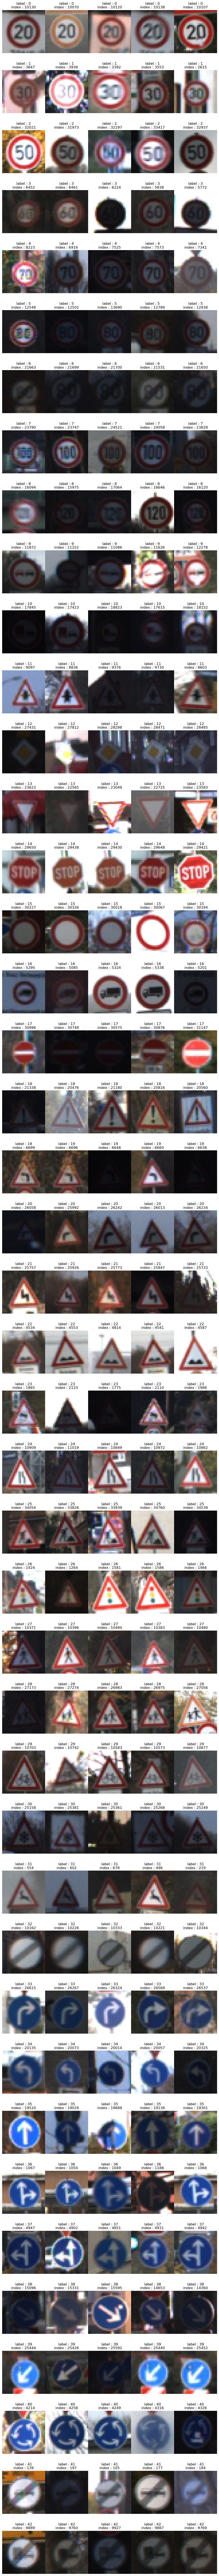

In [116]:
'''
    After the first review of labels and the pictures they contain, 
    I want to look at the sequence of pictures with the same 
    label to ensure that the dataset was assembled correctly 
    and examine the spread among the pictures
'''

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=43, ncols=5, figsize=(10,100))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1.2, hspace=0, wspace=0)

# Flatten the array of subplots for easy indexing
axes = axes.ravel()

i = 0
for label in labels_dict['label_list']:
    random.shuffle(labels_dict['index_list'][label])
    for index in labels_dict['index_list'][label][:5]:
        axes[i].imshow(X_train[index])
        axes[i].set_title('label : {}\nindex : {}'.format(label,index))
        axes[i].axis('off')
        i += 1
plt.show()

,Train_labels,Test_labels,Valid_labels
2,2010,750,240
1,1980,720,240
13,1920,720,240
12,1890,690,210
38,1860,690,210


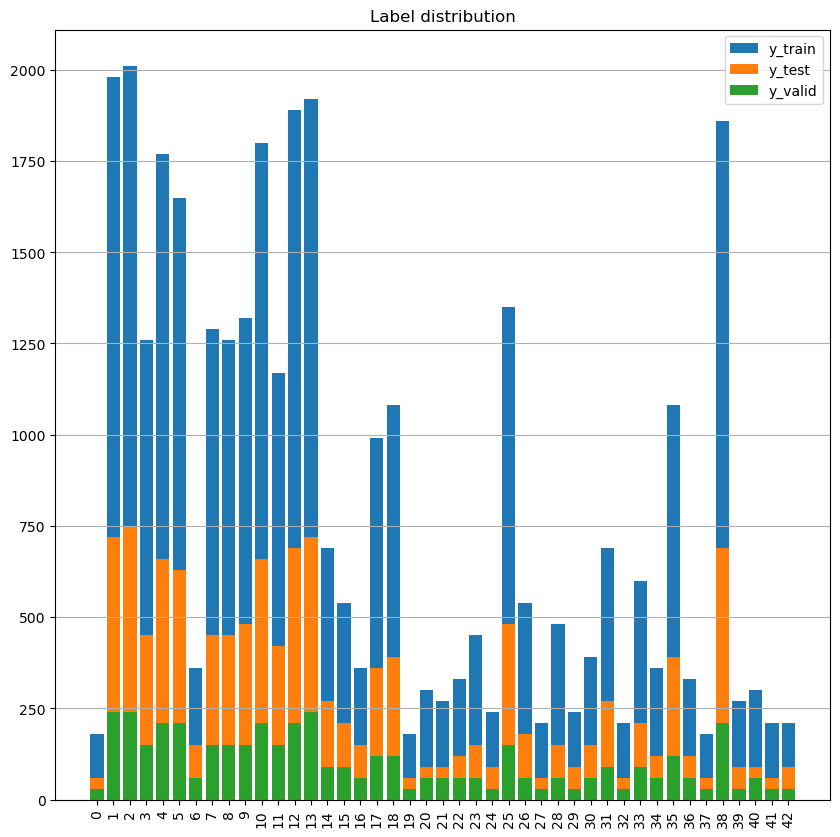

In [117]:
"""
    In the end, I want to look at the data 
    distribution, i.e. how many individual images 
    were taken for training and testing.
"""

distribution_df = pd.concat({
    'Train_labels':pd.Series(y_train).value_counts().sort_index(),
    'Test_labels':pd.Series(y_test).value_counts().sort_index(),
    'Valid_labels':pd.Series(y_valid).value_counts().sort_index()
}, axis=1)

plt.figure(figsize=(10,10))
for data, dataset_name in zip([y_train, y_test, y_valid], ["y_train", "y_test", "y_valid"]):
    labels, counts = np.unique(data, return_counts = True)
    plt.bar(labels, counts, label=dataset_name)
plt.title('Label distribution')
plt.xticks(range(43),rotation = 90)
plt.legend()
plt.grid(axis='y')

distribution_df.sort_values(by='Train_labels',ascending=False).head(5)

- <b>Conclusion</b>
    - In this picture, you can see that most of the data is concentrated in the training set, <br>while in the test and validation sets the amount of data is in a similar proportion but in a small amount compared to the training set.

## Feature engineering

In [118]:
'''
    Intensity normalization is a technique used to scale the 
    pixel intensities of an image to a specific range, such as 
    [0, 255] or [0, 1]. This is often used as a preprocessing step 
    before training a machine learning model on image data, as it 
    helps to remove variations in lighting conditions and other 
    factors that can affect the intensity of the pixels.

    By normalizing the intensity, the model will focus on the 
    features of the image, such as edges and shapes, rather than 
    variations in the pixel intensity. This can improve the performance 
    of the model and increase the robustness of the results.

    Additionally, normalizing the pixel intensity can help to reduce 
    the computational cost of processing the image, as it allows the 
    model to work with smaller values. And it also making the data ready 
    for next step of preprocessing.
'''
# Convert the images in X_train, X_test and X_valid to grayscale using intensity normalization
X_train_norm = np.sum(X_train/3,axis = 3, keepdims = True)
X_test_norm = np.sum(X_test/3,axis = 3, keepdims = True)
X_val_norm = np.sum(X_valid/3,axis = 3, keepdims = True)

# Feature scaling to convert value between -1,1
X_train_norm = (X_train_norm - 128) / 128
X_test_norm = (X_test_norm - 128) / 128
X_val_norm = (X_val_norm - 128) / 128

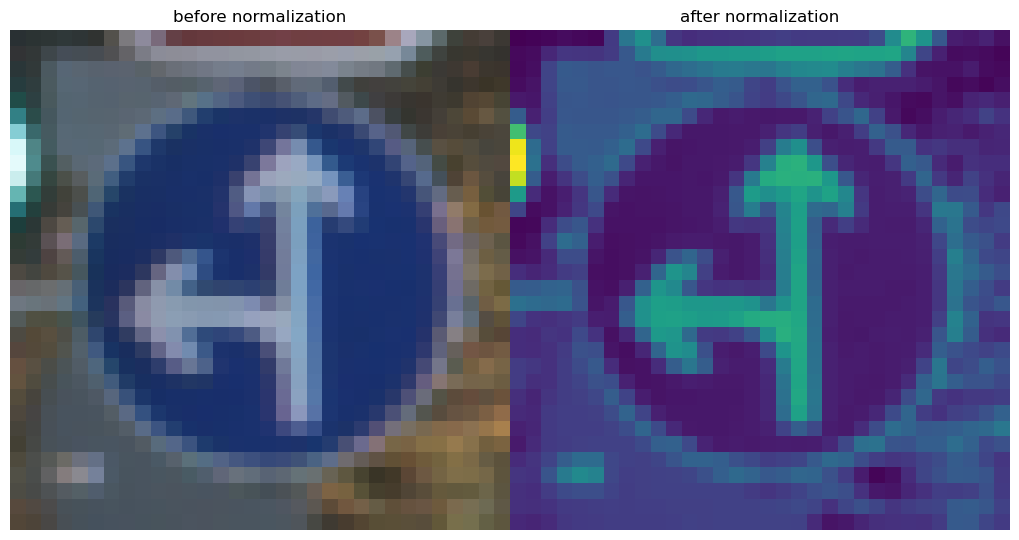

In [119]:
# Index for change plot
index = 4939

# Show original image
plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0, wspace=0)
plt.subplot(1,2,1)
plt.title('before normalization')
plt.imshow(X_train[index])
plt.axis('off')

# Show normalized image
plt.subplot(1,2,2)
plt.title('after normalization')
plt.imshow(X_train_norm[index])
plt.axis('off')

# Display the figure
plt.show()

## Base model development

In [120]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=10)
checkpointer = ModelCheckpoint(filepath='Vol_1_best_model.h5', save_best_only=True, monitor='val_accuracy')

# Define the model
model = Sequential()

# Adding the first convolutional layer
model.add(Conv2D(6,kernel_size=(5,5),activation='relu',input_shape=(32,32,1)))

# Adding a average pooling layer
model.add(AveragePooling2D())

# Adding a second convolutional layer
model.add(Conv2D(16,kernel_size=(5,5),activation='relu'))

# Adding a average pooling layer
model.add(AveragePooling2D())

# Flattening the output
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(120,activation='relu'))

# Adding a fully connected layer
model.add(Dense(84,activation='relu'))

# Adding the output layer
model.add(Dense(43,activation='softmax'))

# Compiling the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Fitting model
history = model.fit(
    X_train_norm,
    y_train,
    batch_size = 500,
    epochs = 50,
    verbose = 1,
    validation_data = (X_val_norm,y_valid),
    callbacks=[early_stopping, checkpointer]
)

Epoch 1/50
70/70 [==============================] - 3s 33ms/step - loss: 3.1951 - accuracy: 0.1776 - val_loss: 2.6603 - val_accuracy: 0.3238
Epoch 2/50
70/70 [==============================] - 2s 31ms/step - loss: 1.6177 - accuracy: 0.5594 - val_loss: 1.3648 - val_accuracy: 0.6095
Epoch 3/50
70/70 [==============================] - 2s 31ms/step - loss: 0.9004 - accuracy: 0.7448 - val_loss: 1.0009 - val_accuracy: 0.7045
Epoch 4/50
70/70 [==============================] - 2s 30ms/step - loss: 0.6485 - accuracy: 0.8191 - val_loss: 0.8481 - val_accuracy: 0.7556
Epoch 5/50
70/70 [==============================] - 2s 30ms/step - loss: 0.5137 - accuracy: 0.8595 - val_loss: 0.7408 - val_accuracy: 0.7841
Epoch 6/50
70/70 [==============================] - 2s 31ms/step - loss: 0.4378 - accuracy: 0.8794 - val_loss: 0.7080 - val_accuracy: 0.7937
Epoch 7/50
70/70 [==============================] - 2s 30ms/step - loss: 0.3686 - accuracy: 0.9009 - val_loss: 0.6570 - val_accuracy: 0.8057
Epoch 8/50
70

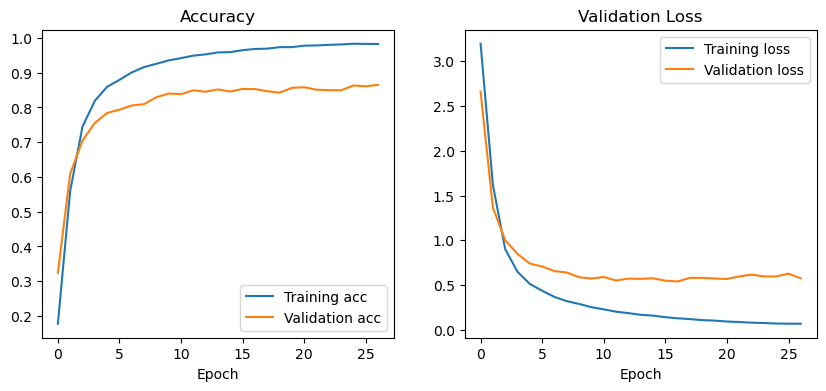

In [121]:
# Evaluating plots
fig, axs = plt.subplots(1, 2,figsize=(10,4))

# Get the length of the data
history_len = len(history.history['accuracy'])

# Create a dictionary to store the plots, labels and titles
plots = {'acc':['accuracy','val_accuracy','Accuracy'],
         'loss':['loss','val_loss','Validation Loss']}

# Iterate over the dictionary and plot the data
for i, (key,value) in enumerate(plots.items()):
    axs[i].plot(range(history_len), history.history[value[0]],label = f'Training {key}')
    axs[i].plot(range(history_len), history.history[value[1]],label = f'Validation {key}')
    axs[i].legend()
    axs[i].set_title(value[2])
    axs[i].set_xlabel('Epoch')
# Show the plot
plt.show()

- <b>Conclusion</b>
    - If the training accuracy is high but the validation accuracy is low, it may<br> indicate that the model is overfitting to the training data. This means that the model <br>is performing well on the training set butis not able to generalize well to new, unseen data.

    - There are several ways to address overfitting:
        - Increasing the size of the training set
        - Using techniques such as dropout, L1/L2 regularization, and early stopping
        - Reducing the complexity of the model by removing unnecessary features or using simpler model architectures.

In [14]:
# Generate generalization metrics
score = model.evaluate(X_test_norm, y_test, verbose=0)
print(f'Test loss: {score[0]}\nTest accuracy: {score[1]}')

# Saving model
model.save('TrafficSignsDetectionVol_1_model.h5')

Test loss: 0.9067326188087463
Test accuracy: 0.8593824505805969


395/395 [==============================] - 1s 2ms/step


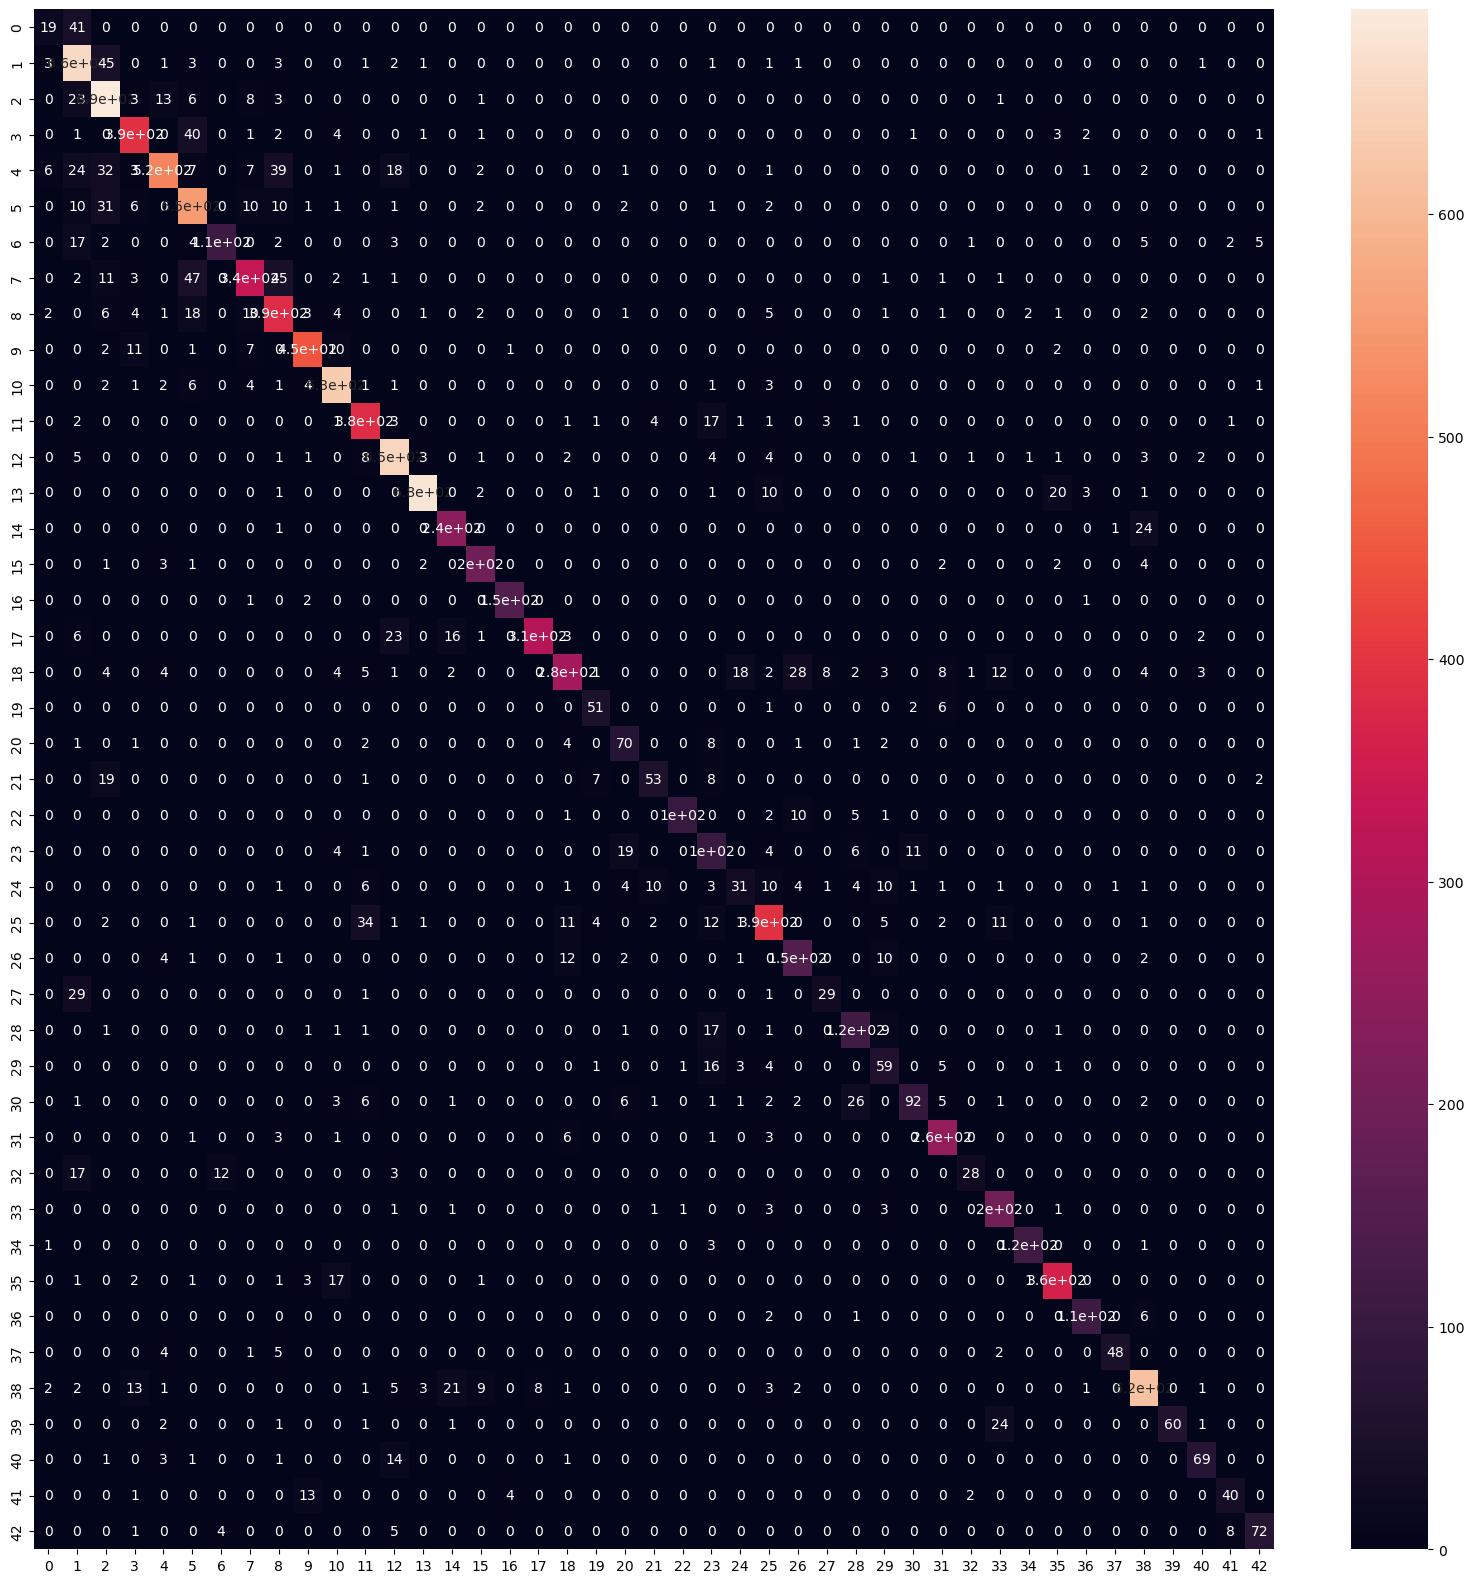

In [15]:
# Confusion_matrix

"""
    A confusion matrix is a table used
    to evaluate the performance of a 
    classification algorithm, showing 
    predicted vs actual classifications 
    in the form of a matrix with diagonal 
    representing correct predictions while 
    off-diagonal elements are incorrect ones.
"""

plt.figure(figsize=(20,20))

sns.heatmap(
    confusion_matrix(
        y_test,
        np.argmax(
            model.predict(X_test_norm),
            axis = 1
        )
    ),annot=True
)

plt.show()

- <b>Conclusion</b>
    - On the matrix, we see how many times the model made a mistake, <br>and I will also illustrate which pictures the model incorrectly predicts.

395/395 [==============================] - 1s 2ms/step


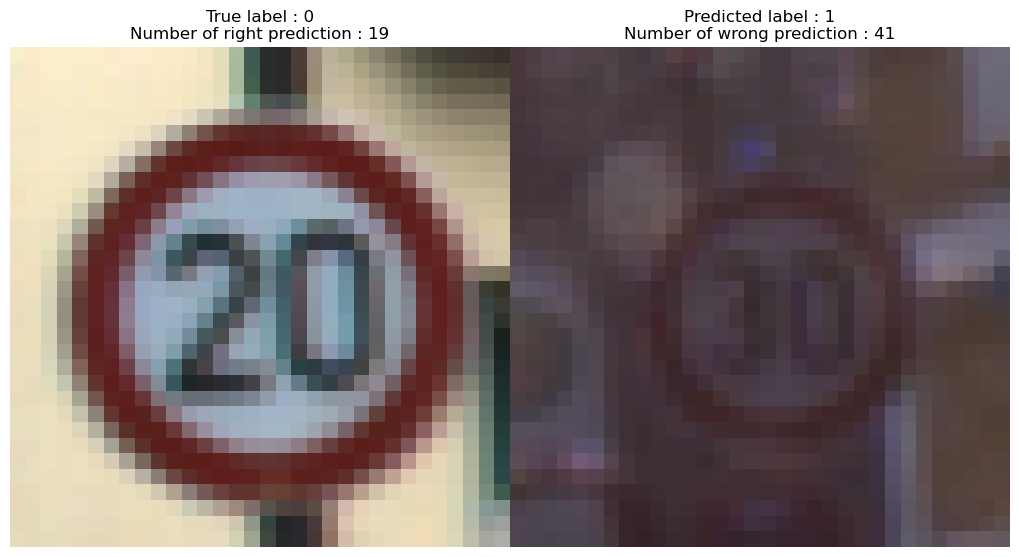

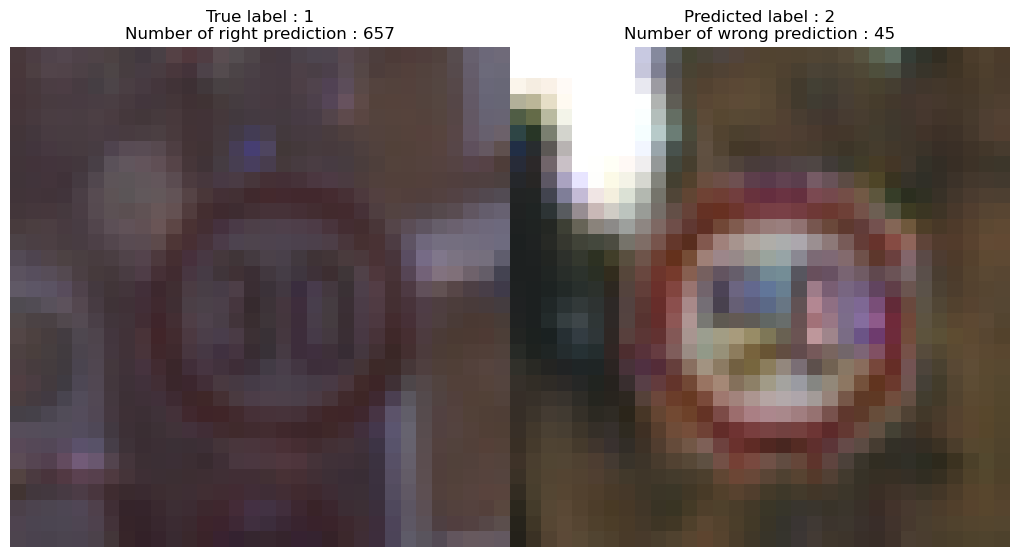

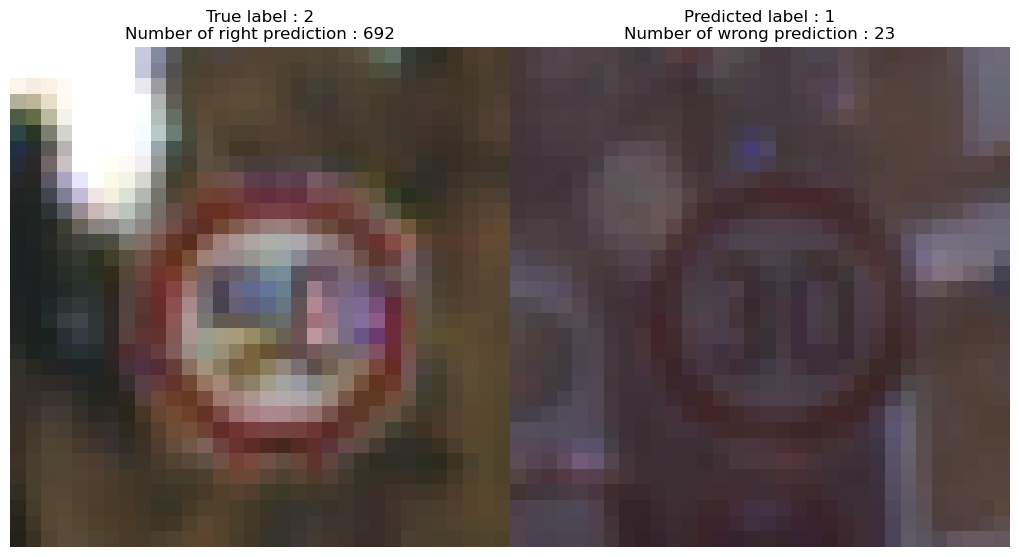

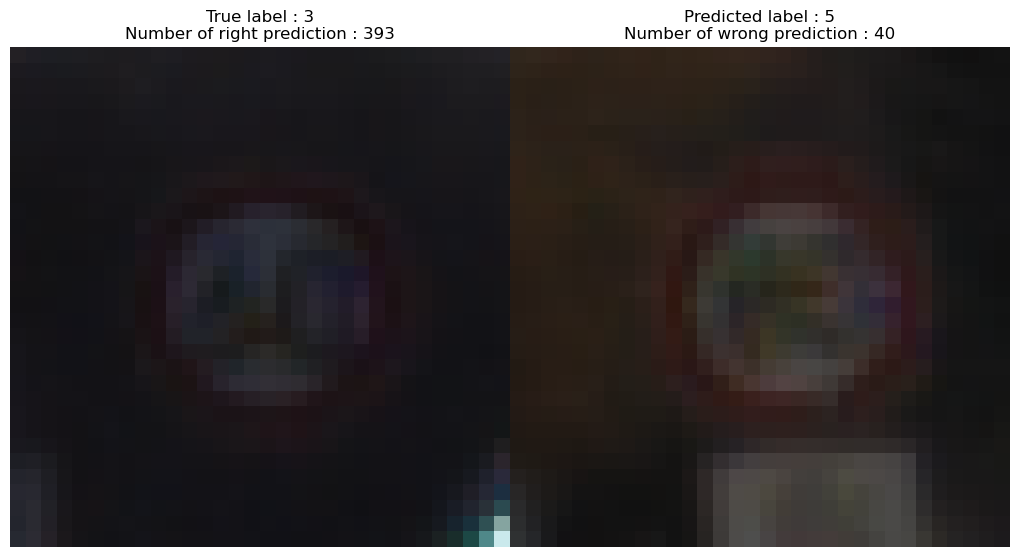

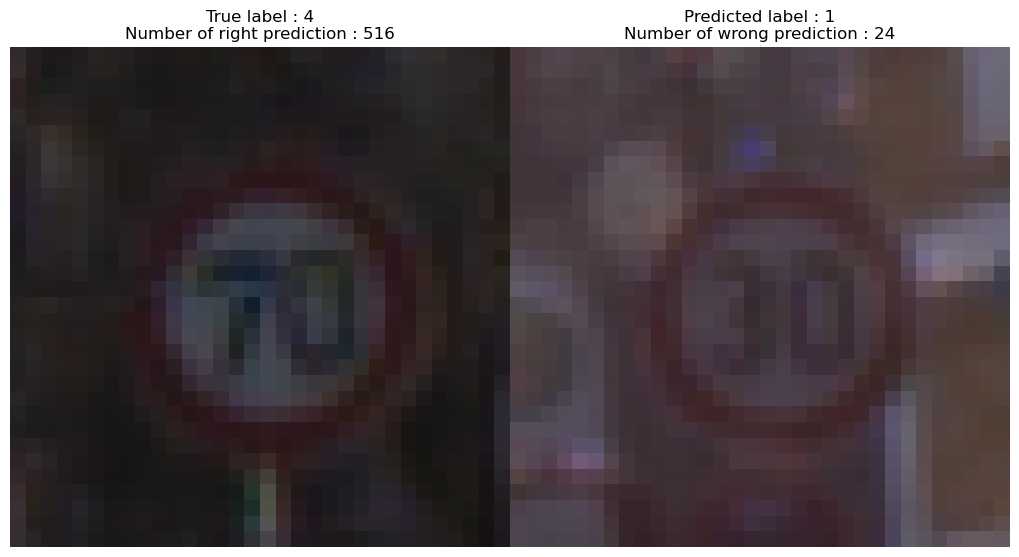

In [110]:
matrix = confusion_matrix(y_test,np.argmax(model.predict(X_test_norm),axis = 1))

conclusion_list = []

for row_n,row in enumerate(matrix):
    for col_n,col in enumerate(row):
        if (matrix[row_n,col_n] > 20) and row_n != col_n:
            conclusion_list.append([row_n,col_n,matrix[row_n,col_n], matrix[row_n,row_n], pd.Series(y_test).value_counts()[row_n]])

conclusion_df = pd.DataFrame(conclusion_list,columns=[
    'True label','Predicted label','Wrong prediction','Right prediction','Total observation'
])

random_stage = 1

for true,predicted,wrong_p,right_p in conclusion_df[['True label','Predicted label','Wrong prediction','Right prediction']].head(5).values:
    
    true_label_index = pd.Series(y_train)[pd.Series(y_train)==true].index[random_stage]
    predicted_label_index = pd.Series(y_train)[pd.Series(y_train)==predicted].index[random_stage]

    plt.figure(figsize=(10,10))
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0, wspace=0)
    plt.subplot(1,2,1)
    plt.title('True label : {}\nNumber of right prediction : {}'.format(true,right_p))
    plt.imshow(X_train[true_label_index])
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.title('Predicted label : {}\nNumber of wrong prediction : {}'.format(predicted,wrong_p))
    plt.imshow(X_train[predicted_label_index])
    plt.axis('off')
    
    plt.show()

- <b>Conclusion</b>
    - The main reason for model errors is related to the quality of the images.

In [16]:
# Observating classification report

"""
    As the "classification report" metric 
    results cannot be sorted to make it easier 
    observating. We will write the code 
    below for optimization.
"""

print(
    classification_report(
        y_test,
        np.argmax(
            model.predict(X_test_norm),
            axis=1
        )
    )
)

395/395 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.58      0.32      0.41        60
           1       0.78      0.91      0.84       720
           2       0.81      0.92      0.86       750
           3       0.89      0.87      0.88       450
           4       0.93      0.78      0.85       660
           5       0.80      0.88      0.84       630
           6       0.87      0.73      0.79       150
           7       0.87      0.74      0.80       450
           8       0.76      0.86      0.81       450
           9       0.94      0.93      0.94       480
          10       0.92      0.96      0.94       660
          11       0.85      0.91      0.88       420
          12       0.89      0.94      0.92       690
          13       0.98      0.95      0.96       720
          14       0.85      0.90      0.88       270
          15       0.90      0.93      0.91       210
          16       0.97   

In [26]:
classification_report_dct = classification_report(y_test,np.argmax(model.predict(X_test_norm),axis=1),output_dict=True)

score_dict = {
    'precision':[],
    'recall':[],
    'f1-score':[]
}

metric_list = [
    'precision',
    'recall',
    'f1-score'
]

for label in classification_report_dct:
    for metric in metric_list:
        try : 
            score_dict[metric].append(np.around((classification_report_dct[label][metric]),2))
        except:
            pass
        
conclusion_df = pd.merge(
    pd.DataFrame(score_dict),
    distribution_df,
    left_index=True,
    right_index=True
).sort_values(by=['precision'],ascending=False)
conclusion_df.head(5)

395/395 [==============================] - 1s 1ms/step


,precision,recall,f1-score,Train_labels,Test_labels,Valid_labels
39,1.00,0.67,0.80,270,90,30
22,0.98,0.84,0.91,330,120,60
13,0.98,0.95,0.96,1920,720,240
17,0.97,0.86,0.91,990,360,120
34,0.97,0.96,0.96,360,120,60


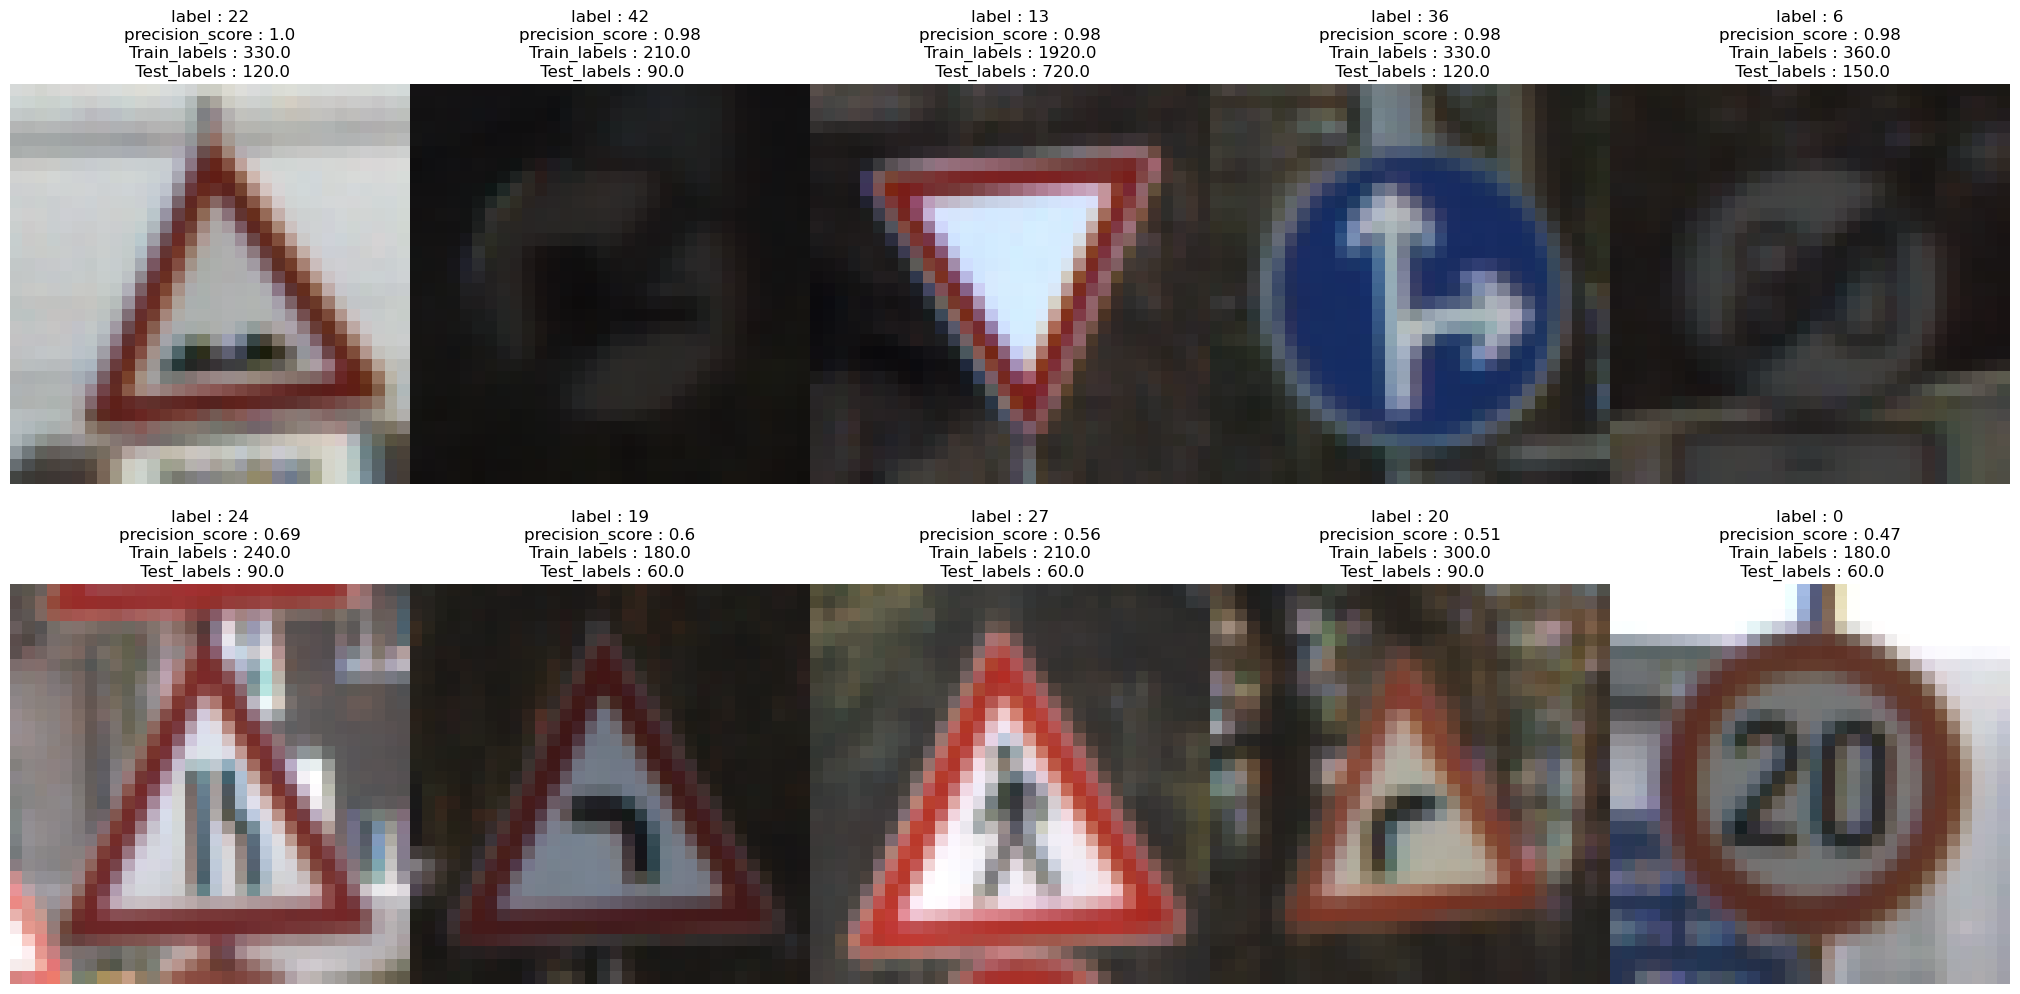

In [15]:
'''
    After getting the intermediate results of the model, 
    I look at the labels that are predicted with the best 
    and worst accuracy and also look at their distribution 
    of data and try to understand the reason of bad prediction.
'''

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0, wspace=0)
axes = axes.ravel()

#Extracting values from dataframe to local variable
conclusion_df = conclusion_df.copy()

#Use loop and function to plot all subplots
for i, label in enumerate(conclusion_df.head(5).index):
    record = conclusion_df.loc[label]
    plot_subplot(axes[i], label, record, 50)

for i, label in enumerate(conclusion_df.tail(5).index, start=5):
    record = conclusion_df.loc[label]
    plot_subplot(axes[i], label, record, 50)

plt.show()

- <b>Conclusion</b>
    - The average accuracy of this model for the "accuracy" parameter is more than 85%, so I<br> can conclude that the model is not bad. But for labels [20, 40, 26, 0, 29] the precision of correct <br>predictions is very low, less than 60%. In future versions of the project, I will try to improve the precision for <br>these categories by fine-tuning of hyperparameters and refactoring neural network architecture.